In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import re
import warnings
from collections import Counter

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



# Scikit-Learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\796656\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\796656\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\796656\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
# Check the shape and info
print(df.shape)
print(df.info())

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


### Exploratory Analysis

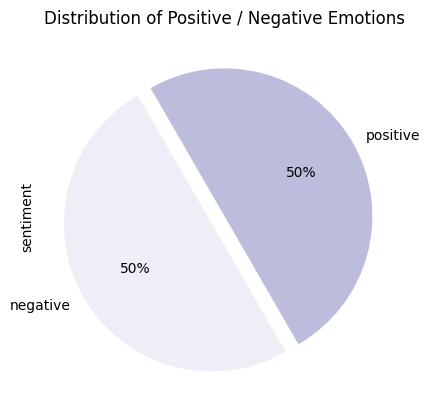

In [5]:
# Distribution of sentiments
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%2.0f%%', startangle=300, colors=["#bcbddc", "#efedf5"])
plt.title("Distribution of Positive / Negative Emotions")
plt.show()

In [6]:
# Display sample reviews
for i in range(3):
    print("Review: ", df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [7]:
# Count the sentiment
print(df.groupby(['sentiment'])[['sentiment']].count())

           sentiment
sentiment           
negative       25000
positive       25000


In [8]:
# Replace sentiment labels with numeric values
df['sentiment'].replace({"positive": 1, "negative": 0}, inplace=True)

In [12]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Preprocessing the reviews
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
def process(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-letters
    text = text.lower()  # Convert to lower case
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stop words and lemmatize
    return ' '.join(words)

In [14]:
import re
df['review'] = df['review'].apply(process)

In [15]:
# New word count after processing
df['new_word_count'] = df['review'].apply(lambda x: len(x.split()))
print(df.head())

                                              review  sentiment  \
0  one reviewer mentioned watching oz episode hoo...          1   
1  wonderful little production filming technique ...          1   
2  thought wonderful way spend time hot summer we...          1   
3  basically family little boy jake think zombie ...          0   
4  petter mattei love time money visually stunnin...          1   

   new_word_count  
0             162  
1              86  
2              84  
3              64  
4             125  


### WORD CLOUD

In [16]:
# Word Cloud for Positive Reviews
pos_reviews = df[df['sentiment'] == 1]
neg_reviews = df[df['sentiment'] == 0]

In [17]:
pos_text = " ".join(review for review in pos_reviews['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

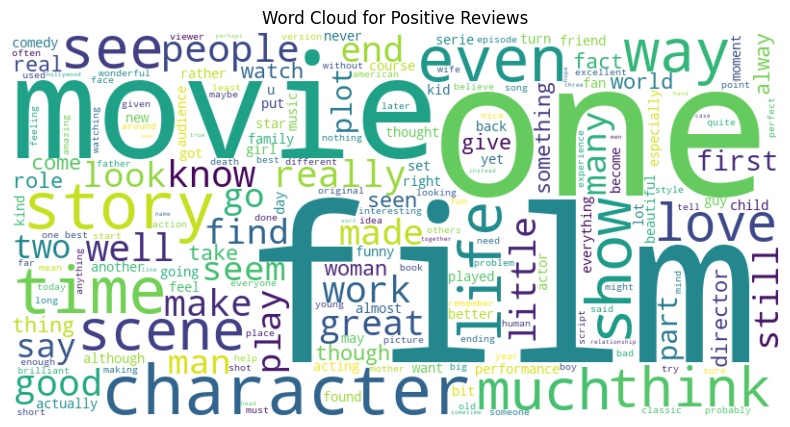

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [19]:
# Word Cloud for Negative Reviews
neg_text = " ".join(review for review in neg_reviews['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

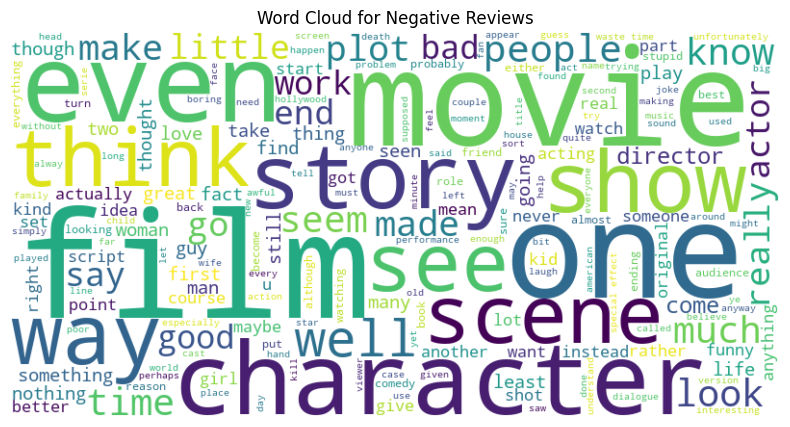

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


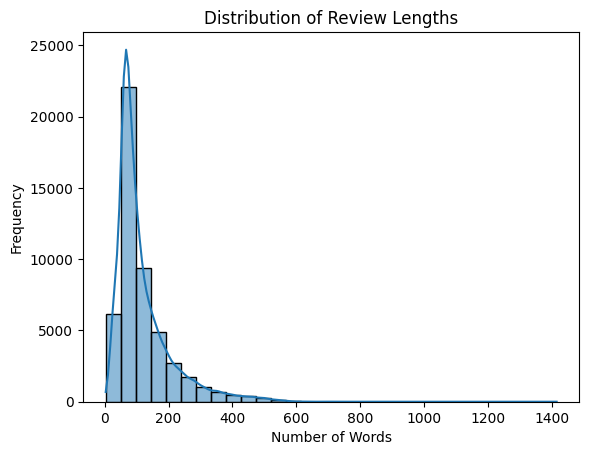

In [21]:
# Distribution of review lengths
sns.histplot(df['new_word_count'], kde=True, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

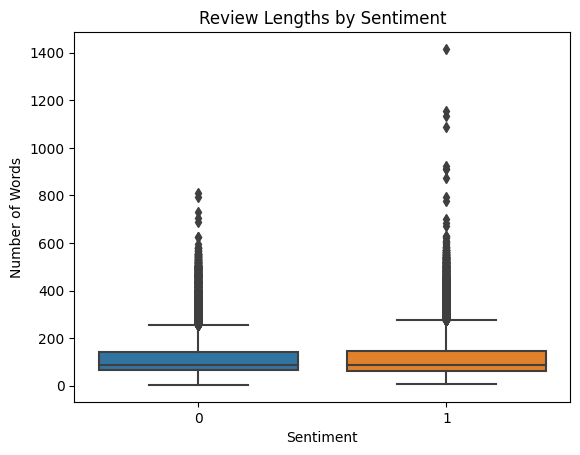

In [22]:
# Boxplot of review lengths by sentiment
sns.boxplot(x='sentiment', y='new_word_count', data=df)
plt.title('Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

In [23]:
# Most common words in positive reviews
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
print(pos_words.head())

    word  count
0   film  49693
1  movie  44836
2    one  28280
3   like  18193
4   time  16310


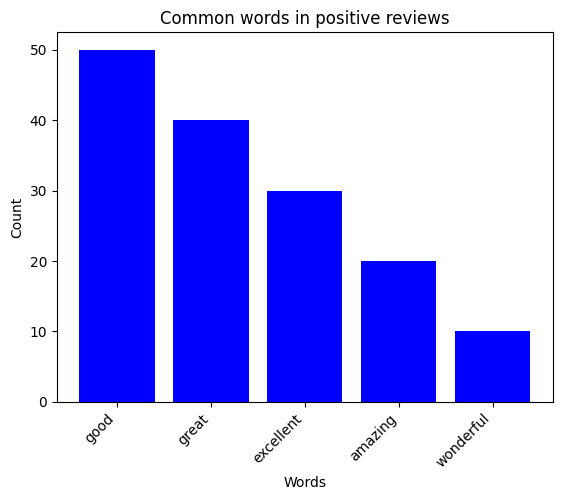

In [24]:
import matplotlib.pyplot as plt

# Sample data for demonstration
pos_words = {'word': ['good', 'great', 'excellent', 'amazing', 'wonderful'],
             'count': [50, 40, 30, 20, 10]}

# Create the bar chart
plt.bar(pos_words['word'], pos_words['count'], color='blue')
plt.title('Common words in positive reviews')
plt.xlabel('Words')
plt.ylabel('Count')

# Rotate x-tick labels
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()


In [25]:
# Most common words in negative reviews
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
print(neg_words.head())

    word  count
0  movie  58402
1   film  43735
2    one  27152
3   like  22927
4   even  15244


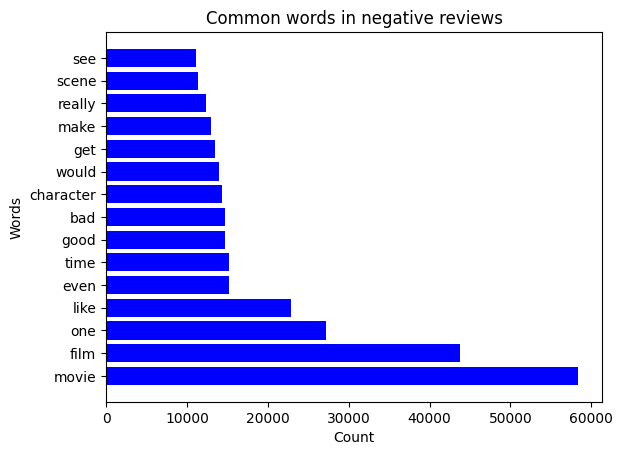

In [26]:
plt.barh(neg_words['word'], neg_words['count'], color='blue')
plt.title('Common words in negative reviews')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

### MODEL TRAINING

### Traditional Machine Learning

### Logistic Regression

In [24]:
# Feature extraction using TF-IDF
vect = TfidfVectorizer(ngram_range=(1, 2))  # Considering bigrams
X = vect.fit_transform(df['review'])
Y = df['sentiment']


In [25]:
# Splitting the dataset into training, validation, and testing
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_val: ", x_val.shape)
print("Size of y_val: ", y_val.shape)
print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)

Size of x_train:  (30000, 2979908)
Size of y_train:  (30000,)
Size of x_val:  (10000, 2979908)
Size of y_val:  (10000,)
Size of x_test:  (10000, 2979908)
Size of y_test:  (10000,)


In [26]:
# Logistic Regression with Hyperparameter Tuning
logreg = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(x_train, y_train)
best_logreg = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .............C=0.001, solver=lbfgs;, score=0.818 total time=   5.6s
[CV 2/5] END .............C=0.001, solver=lbfgs;, score=0.837 total time=   4.4s
[CV 3/5] END .............C=0.001, solver=lbfgs;, score=0.823 total time=   5.3s
[CV 4/5] END .............C=0.001, solver=lbfgs;, score=0.807 total time=   5.0s
[CV 5/5] END .............C=0.001, solver=lbfgs;, score=0.829 total time=   5.2s
[CV 1/5] END .........C=0.001, solver=liblinear;, score=0.817 total time=   0.8s
[CV 2/5] END .........C=0.001, solver=liblinear;, score=0.836 total time=   0.8s
[CV 3/5] END .........C=0.001, solver=liblinear;, score=0.819 total time=   0.8s
[CV 4/5] END .........C=0.001, solver=liblinear;, score=0.806 total time=   0.8s
[CV 5/5] END .........C=0.001, solver=liblinear;, score=0.827 total time=   0.7s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.825 total time=   5.9s
[CV 2/5] END ..............C=0.01, solver=lbfgs;

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ................C=10, solver=lbfgs;, score=0.898 total time=  48.6s
[CV 2/5] END ................C=10, solver=lbfgs;, score=0.898 total time=  27.8s
[CV 3/5] END ................C=10, solver=lbfgs;, score=0.893 total time=  44.7s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ................C=10, solver=lbfgs;, score=0.893 total time=  48.6s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ................C=10, solver=lbfgs;, score=0.894 total time=  48.6s
[CV 1/5] END ............C=10, solver=liblinear;, score=0.898 total time=   4.4s
[CV 2/5] END ............C=10, solver=liblinear;, score=0.898 total time=   4.2s
[CV 3/5] END ............C=10, solver=liblinear;, score=0.893 total time=   4.2s
[CV 4/5] END ............C=10, solver=liblinear;, score=0.893 total time=   4.2s
[CV 5/5] END ............C=10, solver=liblinear;, score=0.894 total time=   4.1s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.902 total time=  47.9s
[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.900 total time=  24.1s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.897 total time=  49.0s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.897 total time=  47.4s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.898 total time=  47.8s
[CV 1/5] END ...........C=100, solver=liblinear;, score=0.902 total time=   7.0s
[CV 2/5] END ...........C=100, solver=liblinear;, score=0.900 total time=   6.7s
[CV 3/5] END ...........C=100, solver=liblinear;, score=0.896 total time=   6.6s
[CV 4/5] END ...........C=100, solver=liblinear;, score=0.896 total time=   6.4s
[CV 5/5] END ...........C=100, solver=liblinear;, score=0.898 total time=   6.9s


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
logreg_pred = best_logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Test accuracy: {:.2f}%".format(logreg_acc * 100))
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Test accuracy: 90.43%
[[4410  569]
 [ 388 4633]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4979
           1       0.89      0.92      0.91      5021

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



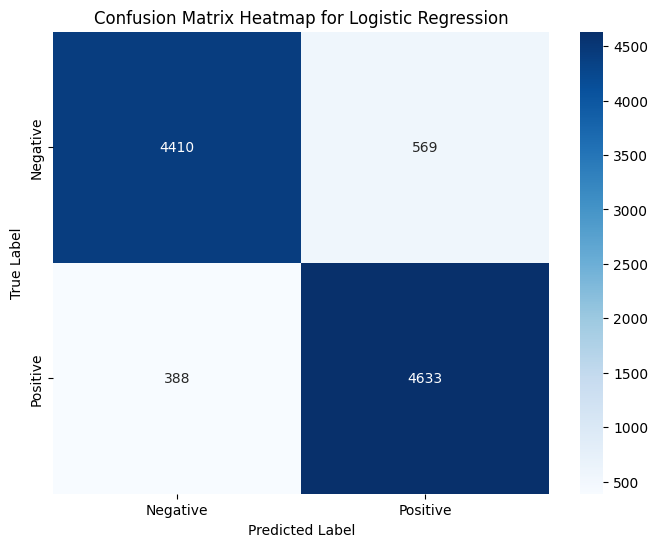

In [28]:
# Plot Confusion Matrix Heatmap for Logistic Regression
conf_matrix = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### NAIVE BAYES 

In [29]:
# Naive Bayes with Hyperparameter Tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Common values for alpha
}

mnb = MultinomialNB()
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)
best_mnb = grid_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [30]:
mnb_pred = best_mnb.predict(x_test)
mnb_acc = accuracy_score(y_test, mnb_pred)
print("Naive Bayes Test accuracy: {:.2f}%".format(mnb_acc * 100))
print(confusion_matrix(y_test, mnb_pred))
print(classification_report(y_test, mnb_pred))

Naive Bayes Test accuracy: 89.07%
[[4439  540]
 [ 553 4468]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4979
           1       0.89      0.89      0.89      5021

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



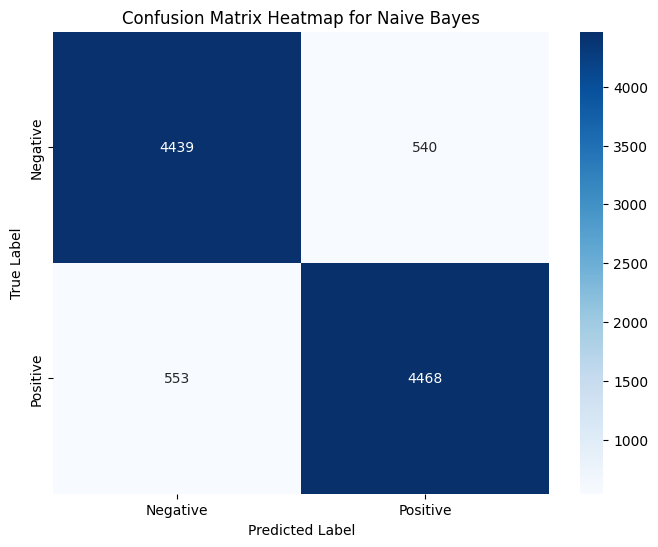

In [31]:
# Plot Confusion Matrix Heatmap for Naive Bayes
conf_matrix = confusion_matrix(y_test, mnb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Deep Learning Training

In [27]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [28]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [29]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

In [30]:
max_sequence_length = 200  # Maximum sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length)

In [31]:
# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=2)
y_val_categorical = to_categorical(y_val, num_classes=2)

### SIMPLE RNN

In [46]:
# Simple RNN model
def create_rnn_model(units=128, dropout_rate=0.5, optimizer='adam'):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
        SimpleRNN(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [47]:
# Train Simple RNN model
rnn_model = create_rnn_model()
rnn_model.fit(X_train_padded, y_train_categorical, validation_data=(X_val_padded, y_val_categorical), epochs=10, batch_size=64)

Epoch 1/10
625/625 [==============================] - 59s 93ms/step - loss: 0.5998 - accuracy: 0.6673 - val_loss: 0.4513 - val_accuracy: 0.7955
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4500 - accuracy: 0.7998 - val_loss: 0.5646 - val_accuracy: 0.7120
Epoch 3/10
625/625 [==============================] - 57s 92ms/step - loss: 0.4455 - accuracy: 0.8065 - val_loss: 0.4446 - val_accuracy: 0.8071
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.5798 - accuracy: 0.6949 - val_loss: 0.4878 - val_accuracy: 0.7756
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.5532 - accuracy: 0.7199 - val_loss: 0.5678 - val_accuracy: 0.7001
Epoch 6/10
625/625 [==============================] - 61s 98ms/step - loss: 0.4867 - accuracy: 0.7698 - val_loss: 0.6240 - val_accuracy: 0.6443
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4400 - accuracy: 0.8055 - val_loss: 0.4712 - val_accuracy

In [48]:
# Evaluate Simple RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_val_padded, y_val_categorical)
print(f"Simple RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}")

313/313 [==============================] - 5s 17ms/step - loss: 0.6209 - accuracy: 0.6576
Simple RNN Model - Loss: 0.6209228038787842, Accuracy: 0.6575999855995178


In [49]:
# Predictions
y_val_pred_rnn = rnn_model.predict(X_val_padded)
y_val_pred_rnn_classes = np.argmax(y_val_pred_rnn, axis=1)

313/313 [==============================] - 5s 17ms/step


In [50]:
# Classification report and confusion matrix
print("Simple RNN Classification Report:")
print(classification_report(y_val, y_val_pred_rnn_classes))

Simple RNN Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      4961
           1       0.65      0.69      0.67      5039

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



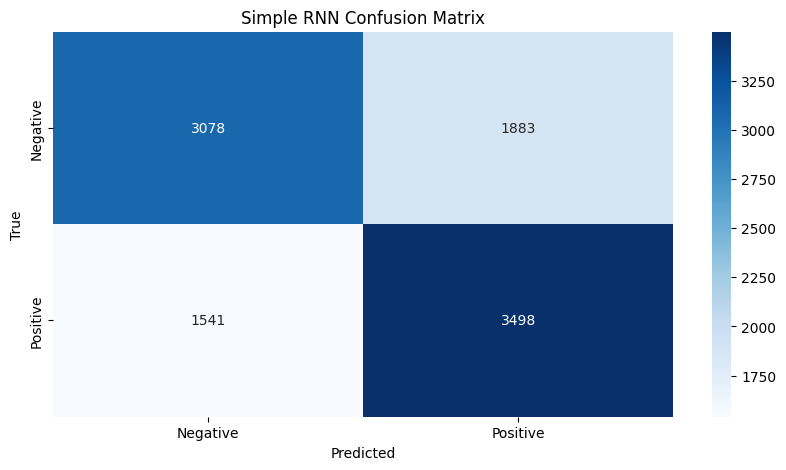

In [51]:
conf_matrix_rnn = confusion_matrix(y_val, y_val_pred_rnn_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Simple RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### LTSM

In [52]:
# Define the LSTM model
def create_lstm_model(units=128, dropout_rate=0.5, optimizer='adam'):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [53]:
# Train LSTM model
lstm_model = create_lstm_model()
lstm_model.fit(X_train_padded, y_train_categorical, validation_data=(X_val_padded, y_val_categorical), epochs=10, batch_size=64)

Epoch 1/10
625/625 [==============================] - 185s 293ms/step - loss: 0.3623 - accuracy: 0.8398 - val_loss: 0.2894 - val_accuracy: 0.8860
Epoch 2/10
625/625 [==============================] - 186s 298ms/step - loss: 0.2086 - accuracy: 0.9217 - val_loss: 0.2873 - val_accuracy: 0.8824
Epoch 3/10
625/625 [==============================] - 190s 304ms/step - loss: 0.1517 - accuracy: 0.9451 - val_loss: 0.3508 - val_accuracy: 0.8803
Epoch 4/10
625/625 [==============================] - 186s 297ms/step - loss: 0.1082 - accuracy: 0.9612 - val_loss: 0.3448 - val_accuracy: 0.8782
Epoch 5/10
625/625 [==============================] - 187s 300ms/step - loss: 0.0841 - accuracy: 0.9705 - val_loss: 0.3766 - val_accuracy: 0.8668
Epoch 6/10
625/625 [==============================] - 192s 307ms/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.4713 - val_accuracy: 0.8823
Epoch 7/10
625/625 [==============================] - 188s 300ms/step - loss: 0.0532 - accuracy: 0.9825 - val_loss: 0.4595 -

In [54]:
# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_val_padded, y_val_categorical)
print(f"LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")

313/313 [==============================] - 17s 53ms/step - loss: 0.5729 - accuracy: 0.8758
LSTM Model - Loss: 0.572875440120697, Accuracy: 0.8758000135421753


In [55]:
# Predictions
y_val_pred_lstm = lstm_model.predict(X_val_padded)
y_val_pred_lstm_classes = np.argmax(y_val_pred_lstm, axis=1)

313/313 [==============================] - 17s 53ms/step


In [56]:
# Classification report and confusion matrix
print("LSTM Classification Report:")
print(classification_report(y_val, y_val_pred_lstm_classes))

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4961
           1       0.89      0.86      0.87      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



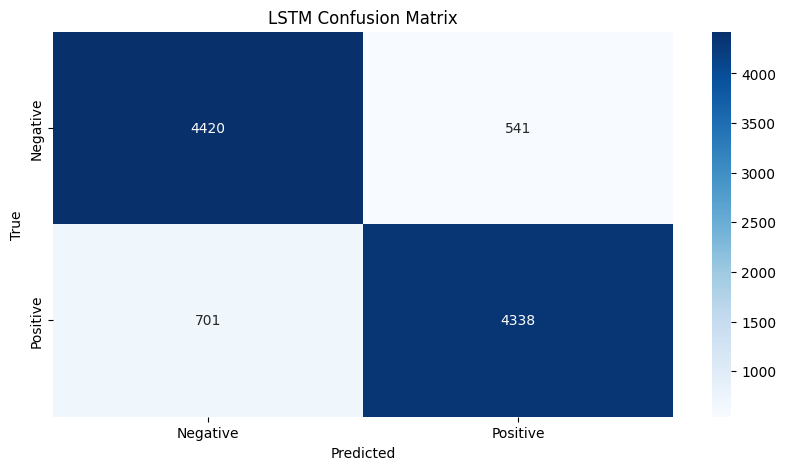

In [57]:
conf_matrix_lstm = confusion_matrix(y_val, y_val_pred_lstm_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### HYPER PARAMETER TUNNING

#### HYPER PARAMETER TUNNING FOR SIMPLE RNN 1 (units=64, dropout_rate=0.3,epochs=5, batch_size=32)

In [62]:
# Simple RNN model
def create_rnn_model(units=64, dropout_rate=0.3, optimizer='adam'):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
        SimpleRNN(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [63]:
# Train Simple RNN model
rnn_model_H = create_rnn_model()
rnn_model_H.fit(X_train_padded, y_train_categorical, validation_data=(X_val_padded, y_val_categorical), epochs=5, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 88s 70ms/step - loss: 0.5011 - accuracy: 0.7373 - val_loss: 0.3594 - val_accuracy: 0.8491
Epoch 2/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.3731 - accuracy: 0.8344 - val_loss: 0.6051 - val_accuracy: 0.6705
Epoch 3/5
1250/1250 [==============================] - 86s 68ms/step - loss: 0.4590 - accuracy: 0.7823 - val_loss: 0.3813 - val_accuracy: 0.8328
Epoch 4/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.2740 - accuracy: 0.8911 - val_loss: 0.3967 - val_accuracy: 0.8360
Epoch 5/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.4043 - accuracy: 0.8199 - val_loss: 0.5891 - val_accuracy: 0.6833


In [64]:
# Evaluate Simple RNN model
rnn_loss, rnn_accuracy = rnn_model_H.evaluate(X_val_padded, y_val_categorical)
print(f"Simple RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}")

313/313 [==============================] - 3s 8ms/step - loss: 0.5891 - accuracy: 0.6833
Simple RNN Model - Loss: 0.5890544056892395, Accuracy: 0.6833000183105469


In [65]:
# Predictions
y_val_pred_rnn = rnn_model_H.predict(X_val_padded)
y_val_pred_rnn_classes = np.argmax(y_val_pred_rnn, axis=1)

313/313 [==============================] - 3s 8ms/step


In [66]:
# Classification report and confusion matrix
print("Simple RNN Classification Report:")
print(classification_report(y_val, y_val_pred_rnn_classes))

Simple RNN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      4961
           1       0.67      0.72      0.70      5039

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



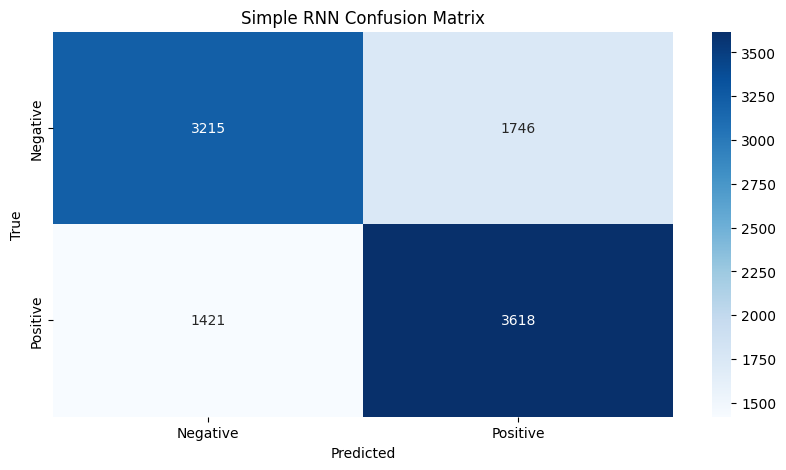

In [67]:
conf_matrix_rnn = confusion_matrix(y_val, y_val_pred_rnn_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Simple RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### HYPER PARAMETER TUNNING FOR SIMPLE RNN 2 (units=256, dropout_rate=0.5,epochs=10, batch_size=32)

In [68]:
# Simple RNN model
def create_rnn_model(units=256, dropout_rate=0.5, optimizer='adam'):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
        SimpleRNN(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [69]:
# Train Simple RNN model
rnn_model_H2 = create_rnn_model()
rnn_model_H2.fit(X_train_padded, y_train_categorical, validation_data=(X_val_padded, y_val_categorical), epochs=10, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 134s 106ms/step - loss: 0.7581 - accuracy: 0.5045 - val_loss: 0.6991 - val_accuracy: 0.5019
Epoch 2/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.6569 - accuracy: 0.6006 - val_loss: 0.7356 - val_accuracy: 0.5936
Epoch 3/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.5235 - accuracy: 0.7452 - val_loss: 0.5166 - val_accuracy: 0.7690
Epoch 4/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.4048 - accuracy: 0.8291 - val_loss: 0.4060 - val_accuracy: 0.8269
Epoch 5/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.3732 - accuracy: 0.8419 - val_loss: 0.4027 - val_accuracy: 0.8394
Epoch 6/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.3468 - accuracy: 0.8488 - val_loss: 0.6079 - val_accuracy: 0.6691
Epoch 7/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.5096 - accuracy: 0.7543 - val_

In [70]:
# Evaluate Simple RNN model
rnn_loss, rnn_accuracy = rnn_model_H2.evaluate(X_val_padded, y_val_categorical)
print(f"Simple RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}")

313/313 [==============================] - 8s 24ms/step - loss: 0.5288 - accuracy: 0.7499
Simple RNN Model - Loss: 0.5288415551185608, Accuracy: 0.7498999834060669


In [71]:
# Predictions
y_val_pred_rnn = rnn_model_H2.predict(X_val_padded)
y_val_pred_rnn_classes = np.argmax(y_val_pred_rnn, axis=1)

313/313 [==============================] - 8s 24ms/step


In [72]:
# Classification report and confusion matrix
print("Simple RNN Classification Report:")
print(classification_report(y_val, y_val_pred_rnn_classes))

Simple RNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      4961
           1       0.80      0.67      0.73      5039

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



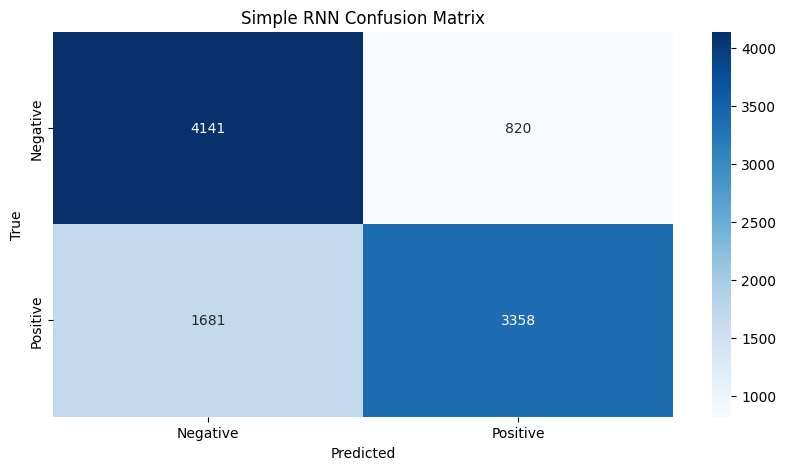

In [73]:
conf_matrix_rnn = confusion_matrix(y_val, y_val_pred_rnn_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Simple RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### HYPER PARAMETER TUNNING FOR LSTM1 (units=64, dropout_rate=0.3,epochs=5, batch_size=32)

In [74]:
# Define the LSTM model
def create_lstm_model(units=64, dropout_rate=0.3, optimizer='adam'):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [75]:
# Train LSTM model
lstm_model_H = create_lstm_model()
lstm_model_H.fit(X_train_padded, y_train_categorical, validation_data=(X_val_padded, y_val_categorical), epochs=5, batch_size=64)

Epoch 1/5
625/625 [==============================] - 93s 147ms/step - loss: 0.3337 - accuracy: 0.8585 - val_loss: 0.2631 - val_accuracy: 0.8903
Epoch 2/5
625/625 [==============================] - 87s 140ms/step - loss: 0.1856 - accuracy: 0.9308 - val_loss: 0.2751 - val_accuracy: 0.8891
Epoch 3/5
625/625 [==============================] - 93s 149ms/step - loss: 0.1221 - accuracy: 0.9562 - val_loss: 0.3457 - val_accuracy: 0.8796
Epoch 4/5
625/625 [==============================] - 93s 149ms/step - loss: 0.0851 - accuracy: 0.9714 - val_loss: 0.3892 - val_accuracy: 0.8791
Epoch 5/5
625/625 [==============================] - 89s 142ms/step - loss: 0.0605 - accuracy: 0.9798 - val_loss: 0.5118 - val_accuracy: 0.8776


In [76]:
# Predictions
y_val_pred_lstm = lstm_model_H.predict(X_val_padded)
y_val_pred_lstm_classes = np.argmax(y_val_pred_lstm, axis=1)

313/313 [==============================] - 7s 21ms/step


In [77]:
# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model_H.evaluate(X_val_padded, y_val_categorical)
print(f"LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")

313/313 [==============================] - 7s 21ms/step - loss: 0.5118 - accuracy: 0.8776
LSTM Model - Loss: 0.5118069052696228, Accuracy: 0.8776000142097473


In [78]:
# Classification report and confusion matrix
print("LSTM Classification Report:")
print(classification_report(y_val, y_val_pred_lstm_classes))

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4961
           1       0.89      0.87      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



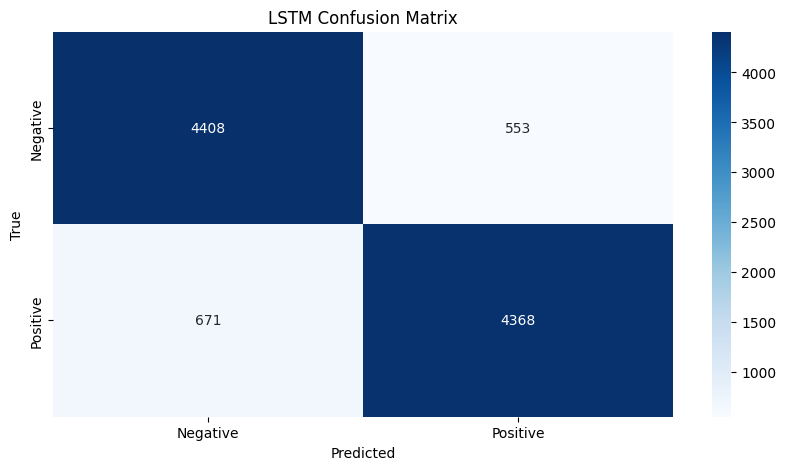

In [79]:
conf_matrix_lstm = confusion_matrix(y_val, y_val_pred_lstm_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### HYPER PARAMETER TUNNING FOR LSTM 2 (units=256, dropout_rate=0.5,epochs=10, batch_size=32)

In [80]:
# Define the LSTM model
def create_lstm_model(units=256, dropout_rate=0.5, optimizer='adam'):
    model = Sequential([
        Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [81]:
# Train LSTM model
lstm_model_H2 = create_lstm_model()
lstm_model_H2.fit(X_train_padded, y_train_categorical, validation_data=(X_val_padded, y_val_categorical), epochs=10, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 491s 391ms/step - loss: 0.3659 - accuracy: 0.8415 - val_loss: 0.2727 - val_accuracy: 0.8859
Epoch 2/10
1250/1250 [==============================] - 484s 387ms/step - loss: 0.2142 - accuracy: 0.9202 - val_loss: 0.2766 - val_accuracy: 0.8836
Epoch 3/10
1250/1250 [==============================] - 476s 380ms/step - loss: 0.1409 - accuracy: 0.9495 - val_loss: 0.3227 - val_accuracy: 0.8826
Epoch 4/10
1250/1250 [==============================] - 475s 380ms/step - loss: 0.0979 - accuracy: 0.9657 - val_loss: 0.3503 - val_accuracy: 0.8722
Epoch 5/10
1250/1250 [==============================] - 469s 375ms/step - loss: 0.0615 - accuracy: 0.9800 - val_loss: 0.4654 - val_accuracy: 0.8717
Epoch 6/10
1250/1250 [==============================] - 486s 389ms/step - loss: 0.0463 - accuracy: 0.9847 - val_loss: 0.5951 - val_accuracy: 0.8584
Epoch 7/10
1250/1250 [==============================] - 474s 379ms/step - loss: 0.0338 - accuracy: 0.9894 - val_

In [82]:
# Predictions
y_val_pred_lstm = lstm_model_H2.predict(X_val_padded)
y_val_pred_lstm_classes = np.argmax(y_val_pred_lstm, axis=1)

313/313 [==============================] - 35s 110ms/step


In [83]:
# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model_H2.evaluate(X_val_padded, y_val_categorical)
print(f"LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")

313/313 [==============================] - 35s 113ms/step - loss: 0.7198 - accuracy: 0.8775
LSTM Model - Loss: 0.7197686433792114, Accuracy: 0.8774999976158142


In [84]:
# Classification report and confusion matrix
print("LSTM Classification Report:")
print(classification_report(y_val, y_val_pred_lstm_classes))

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4961
           1       0.89      0.87      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



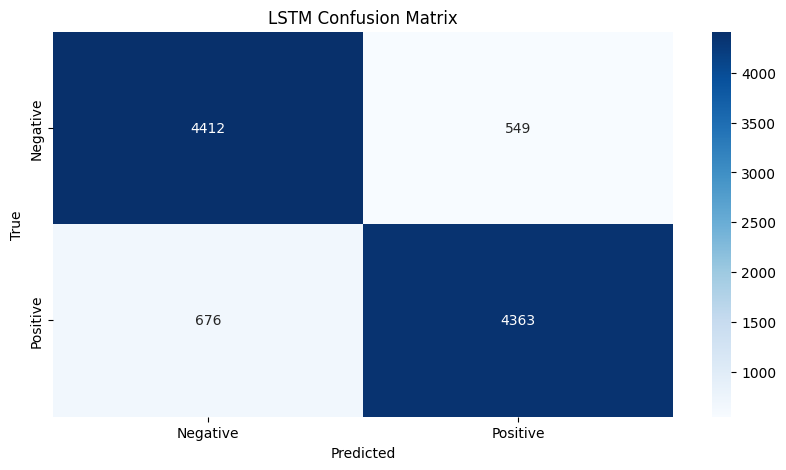

In [85]:
conf_matrix_lstm = confusion_matrix(y_val, y_val_pred_lstm_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()